In [2]:
from gensim.models import KeyedVectors
import gensim.downloader as api

### Load Pretrained Model

In [3]:
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


### Check similiarity between words

In [ ]:
word1 = "king"
word2 = "queen"
similarity = model.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

### Find most similiar word

In [ ]:
similar_words = model.most_similar("education", topn=5)
print("\nWords most similar to 'education':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

### Word analogy task

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(f"\nAnalogy - 'woman' + 'king' - 'man' = {result[0][0]}")


### visulaize word vectors

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
words = ["king", "queen", "man", "woman", "education", "teacher"]
vectors = [model[word] for word in words]

In [6]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

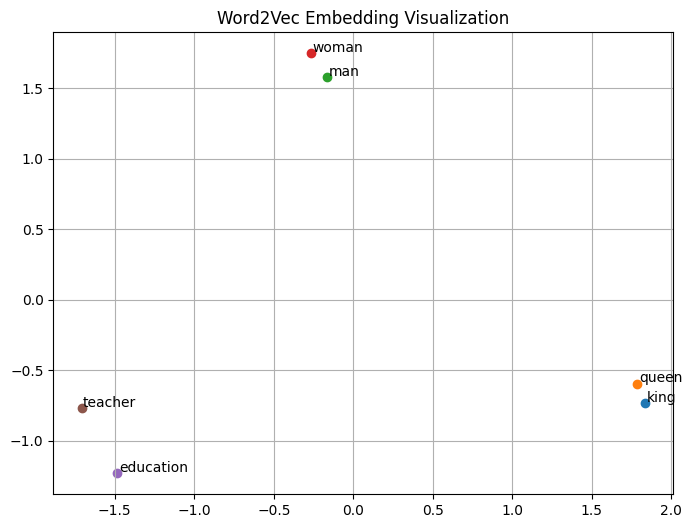

In [7]:
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)
plt.title("Word2Vec Embedding Visualization")
plt.grid(True)
plt.show()